In [19]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import geopandas

In [20]:
#from tueplots import bundles
#plt.rcParams.update(bundles.neurips2021(usetex=False))

In [21]:
df = pd.read_csv("../dat/drug_listings_cleaned.csv", index_col=0)
df

,product_title,product_description,ship_from,ship_to,seller,price,source,ship_from_alpha_3
0,10mg Diazepam Tabletten - 10 Stück,- 10mg Diazepam Tabletten - 10 Stück\n\n- Disk...,Germany,Worldwide,1XAnOYMoUsX1BXx,$67.01,1776,DEU
1,10mg Diazepam Tabletten - 50 Stück,10 mg Diazepam / Valium / Valocordin Tabletten...,Germany,Worldwide,1XAnOYMoUsX1BXx,$93.82,1776,DEU
2,Sonderpreis !!! 10x Diazepam Tropfen 25ml,Diazepam / Valium / Valocordin Tropfen je Flas...,Germany,Worldwide,1XAnOYMoUsX1BXx,$938.32,1776,DEU
3,Sonderpreis !!! 2x Diazepam Tropfen 25ml,Diazepam / Valium / Valocordin Tropfen je Flas...,Germany,Worldwide,1XAnOYMoUsX1BXx,$214.46,1776,DEU
4,1 gr indian Ketamin,Very Strong Ketamin from India be careful\n\ni...,Austria,Worldwide,ACAB23,$50.00,1776,AUT
...,...,...,...,...,...,...,...,...
194428,∎∎ W. Domino XTC ∎∎ 220MG,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.86\nfor 5 Pills,themarketplace,NLD
194429,∎∎ White Domino XTC ► 220mg,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.48\nfor 5 Pills,themarketplace,NLD
194430,∎∎ White Domino XTC ► 220mg,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.82\nfor 5 Pills,themarketplace,NLD
194431,∎∎ Yellow Grenades ∎∎ 170MG,White Domino XTC Pills from the Netherlands\n\...,Europe,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 30.08\nfor 5 Pills,themarketplace,NaN


In [22]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [23]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [40]:
listings_shipped_from_each_country = df["ship_from_alpha_3"].value_counts().rename("ship_from_count").to_frame()
listings_shipped_from_each_country

,ship_from_count
USA,12723
GBR,6794
DEU,5030
NLD,4813
AUS,3565
...,...
GMB,1
SLV,1
CHL,1
GGY,1


In [66]:
merge = pd.merge(world, listings_shipped_from_each_country, left_on="iso_a3", right_index=True, how="left")
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_count
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2931.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12723.0
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",3.0
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN


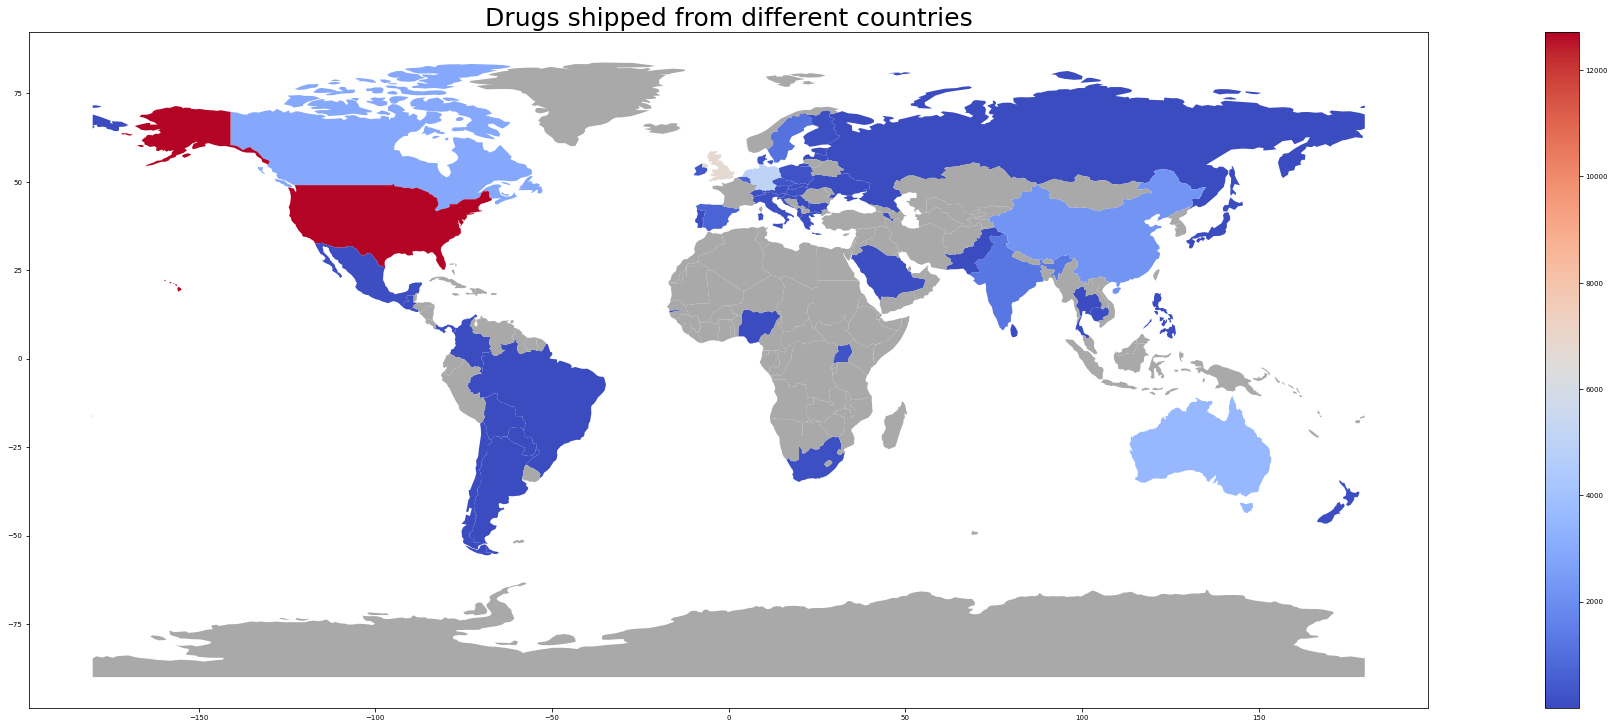

In [67]:
merge.plot(column='ship_from_count', 
           figsize=(35, 10),
           legend=True,
           cmap='coolwarm',
           missing_kwds = dict(color = "darkgrey",))
plt.title('Drugs shipped from different countries', fontsize=25);

In [68]:
merge["ship_from_count_normalized"] = merge["ship_from_count"] / merge["pop_est"]

In [69]:
merge.sort_values(by="ship_from_count_normalized", ascending=False).dropna().head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_count,ship_from_count_normalized
130,17084719,Europe,Netherlands,NLD,870800.0,"POLYGON ((6.90514 53.48216, 7.09205 53.14404, ...",4813.0,0.000282
137,23232413,Oceania,Australia,AUS,1189000.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",3565.0,0.000153
110,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",1109.0,0.000111
143,64769452,Europe,United Kingdom,GBR,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",6794.0,0.000105
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2931.0,0.000082
121,80594017,Europe,Germany,DEU,3979000.0,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",5030.0,0.000062
133,5011102,Europe,Ireland,IRL,322000.0,"POLYGON ((-6.19788 53.86757, -6.03299 53.15316...",312.0,0.000062
129,11491346,Europe,Belgium,BEL,508600.0,"POLYGON ((6.15666 50.80372, 6.04307 50.12805, ...",619.0,0.000054
142,5605948,Europe,Denmark,DNK,264800.0,"MULTIPOLYGON (((9.92191 54.98310, 9.28205 54.8...",287.0,0.000051
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12723.0,0.000039


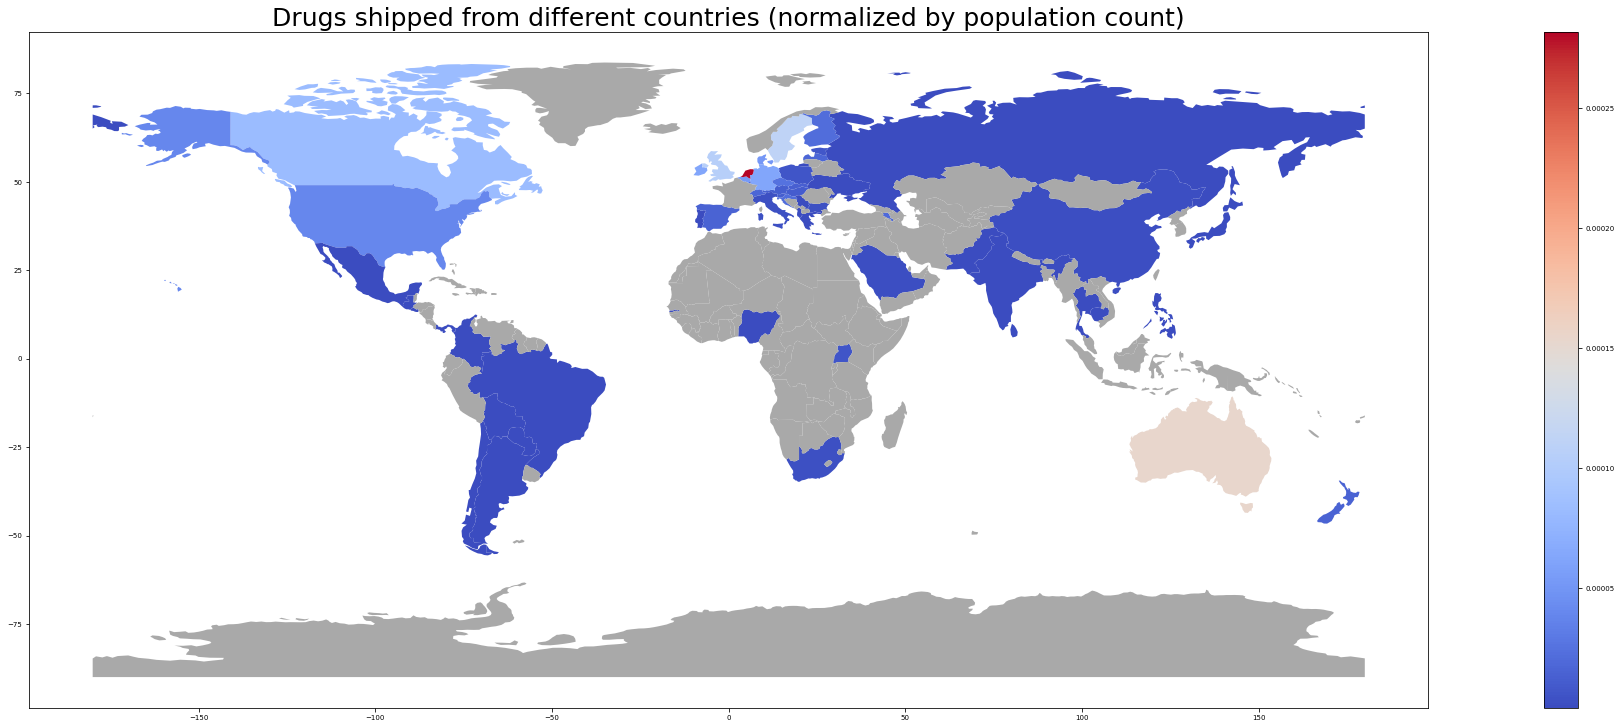

In [70]:
merge.plot(column='ship_from_count_normalized', 
           figsize=(35, 10),
           legend=True,
           cmap='coolwarm',
           missing_kwds = dict(color = "darkgrey",))
plt.title('Drugs shipped from different countries (normalized by population count)', fontsize=25);

We will add the [OWID data on mental and substance use disorders](https://ourworldindata.org/grapher/share-with-mental-and-substance-disorders) to our data:

In [71]:
# source: https://ourworldindata.org/grapher/share-with-mental-and-substance-disorders
df_mental_health = pd.read_csv("../dat/share-with-mental-and-substance-disorders.csv")
df_mental_health.columns = ["entity", "code", "year", "mental_disorder_prevalence"]
df_mental_health

,entity,code,year,mental_disorder_prevalence
0,Afghanistan,AFG,1990,16.659229
1,Afghanistan,AFG,1991,16.765052
2,Afghanistan,AFG,1992,16.874469
3,Afghanistan,AFG,1993,16.990720
4,Afghanistan,AFG,1994,17.112730
...,...,...,...,...
8155,Zimbabwe,ZWE,2015,11.156429
8156,Zimbabwe,ZWE,2016,11.164133
8157,Zimbabwe,ZWE,2017,11.170427
8158,Zimbabwe,ZWE,2018,11.158765


In [73]:
df_mental_health_current = df_mental_health[df_mental_health.year == 2019]
df_mental_health_current

,entity,code,year,mental_disorder_prevalence
29,Afghanistan,AFG,2019,17.117612
59,Africa,NaN,2019,12.669475
89,African Region,NaN,2019,12.211424
119,African Union,NaN,2019,12.669475
149,Albania,ALB,2019,11.558431
...,...,...,...,...
8039,World Bank Regions,NaN,2019,12.798057
8069,World Bank Upper Middle Income,NaN,2019,12.500398
8099,Yemen,YEM,2019,16.401522
8129,Zambia,ZMB,2019,12.112616


In [75]:
merge = pd.merge(merge, df_mental_health_current, left_on="iso_a3", right_on="code", how="left")
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_count,ship_from_count_normalized,entity,code,year,mental_disorder_prevalence
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,Fiji,FJI,2019.0,11.540048
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,Tanzania,TZA,2019.0,12.584239
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2931.0,8.227673e-05,Canada,CAN,2019.0,14.953563
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",12723.0,3.895283e-05,United States,USA,2019.0,16.934621
...,...,...,...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",3.0,4.218802e-07,Serbia,SRB,2019.0,11.379480
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,Montenegro,MNE,2019.0,11.634089
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,Trinidad and Tobago,TTO,2019.0,14.584065


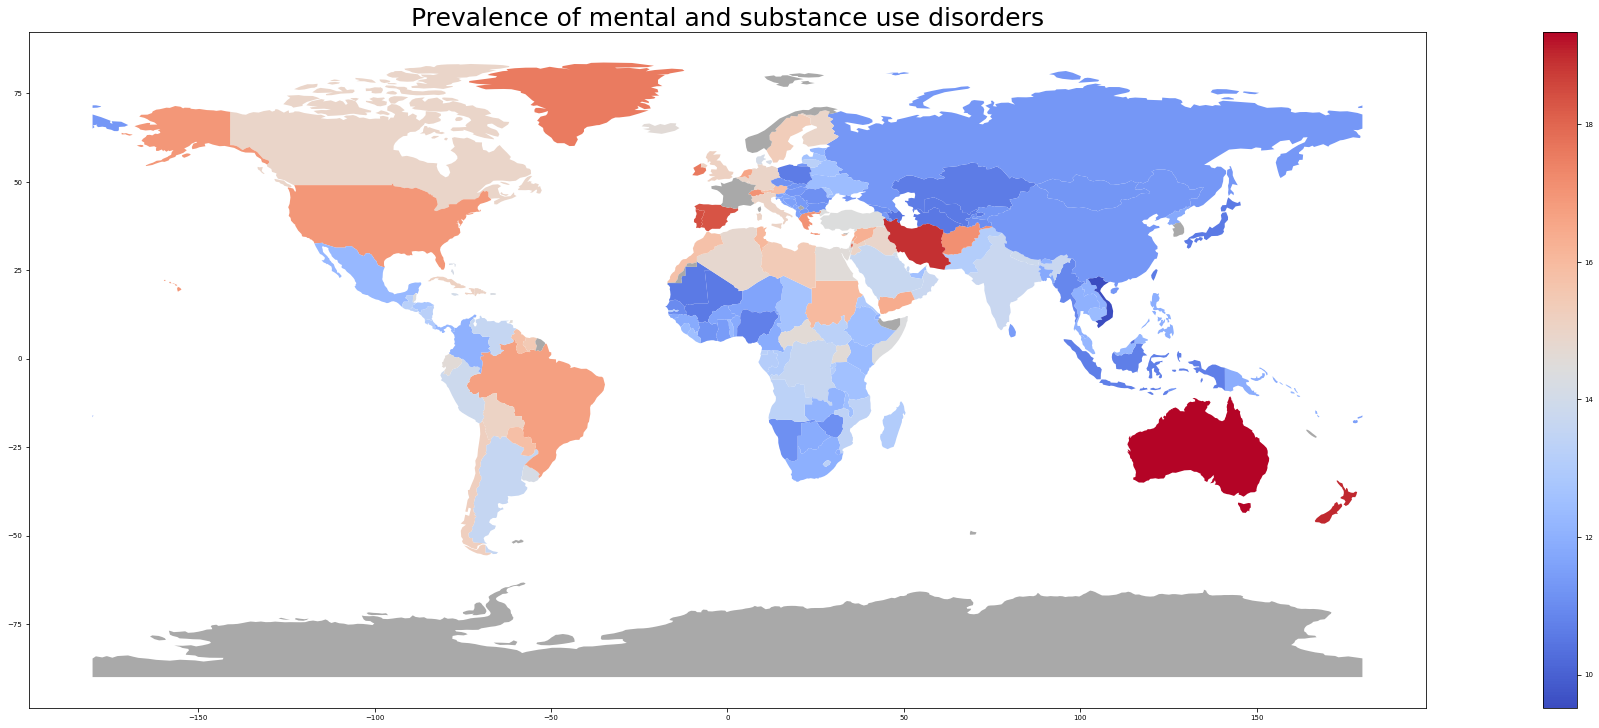

In [76]:
merge.plot(column='mental_disorder_prevalence', 
           figsize=(35, 10),
           legend=True,
           cmap='coolwarm',
           missing_kwds = dict(color = "darkgrey",))
plt.title('Prevalence of mental and substance use disorders', fontsize=25);

In [50]:
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ship_from_count,ship_from_count_normalized,Entity,Code,Year,Mental Disorder Prevalence
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,Fiji,FJI,1990.0,11.506186
1,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,Fiji,FJI,1991.0,11.514596
2,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,Fiji,FJI,1992.0,11.521606
3,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,Fiji,FJI,1993.0,11.527710
4,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,Fiji,FJI,1994.0,11.530983
...,...,...,...,...,...,...,...,...,...,...,...,...
4986,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",NaN,NaN,South Sudan,SSD,2015.0,13.242482
4987,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",NaN,NaN,South Sudan,SSD,2016.0,13.277098
4988,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",NaN,NaN,South Sudan,SSD,2017.0,13.301479
4989,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...",NaN,NaN,South Sudan,SSD,2018.0,13.310486


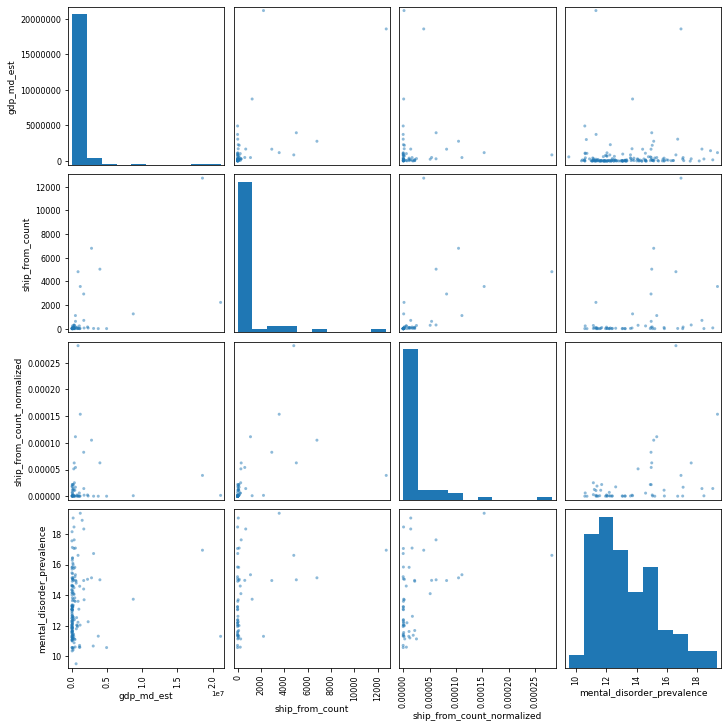

In [78]:
interesting_cols = ["gdp_md_est", "ship_from_count", "ship_from_count_normalized", "mental_disorder_prevalence"]
pd.plotting.scatter_matrix(merge[interesting_cols], figsize=(10,10));